# Assignment 7 - Optimize Code
## A Jupyter to optimize an algorithm running on the [Pascal Triangle](https://en.wikipedia.org/wiki/Pascal%27s_triangle#:~:text=In%20mathematics%2C%20Pascal's%20triangle%20is,China%2C%20Germany%2C%20and%20Italy.)

___ 
This is the default code, whose time complexity should be increased. For that, we will profile the code using the Line-Profiler package as a magic method in Jupyter

In [ ]:
# Default Algoritm 
## Using Dict for storing the Pascal's Triangle and standard Python methods for further algorithms

{3: 1, 6: 2, 4: 1, 10: 2, 5: 1, 15: 2, 20: 1, 21: 2, 35: 2, 7: 1, 28: 2, 56: 2, 70: 1, 8: 1, 36: 2, 84: 2, 126: 2, 9: 1}


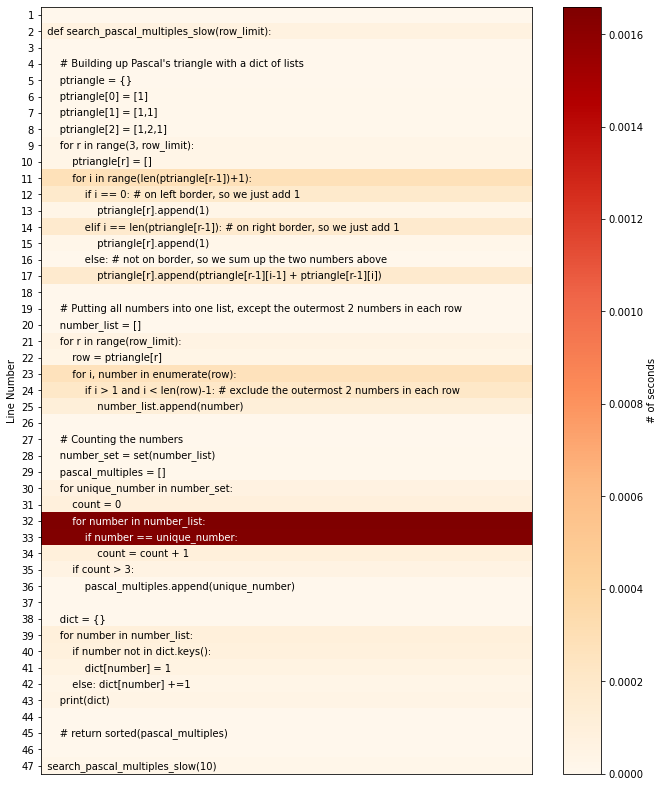

In [205]:
%%heat

def search_pascal_multiples_slow(row_limit):

    # Building up Pascal's triangle with a dict of lists
    ptriangle = {}
    ptriangle[0] = [1]
    ptriangle[1] = [1,1]
    ptriangle[2] = [1,2,1]
    for r in range(3, row_limit):
        ptriangle[r] = []
        for i in range(len(ptriangle[r-1])+1):
            if i == 0: # on left border, so we just add 1
                ptriangle[r].append(1)
            elif i == len(ptriangle[r-1]): # on right border, so we just add 1
                ptriangle[r].append(1)
            else: # not on border, so we sum up the two numbers above
                ptriangle[r].append(ptriangle[r-1][i-1] + ptriangle[r-1][i])

    # Putting all numbers into one list, except the outermost 2 numbers in each row
    number_list = []
    for r in range(row_limit):
        row = ptriangle[r]
        for i, number in enumerate(row):
            if i > 1 and i < len(row)-1: # exclude the outermost 2 numbers in each row
                number_list.append(number)

    # Counting the numbers
    number_set = set(number_list) 
    pascal_multiples = []
    for unique_number in number_set:
        count = 0
        for number in number_list:
            if number == unique_number:
                count = count + 1
        if count > 3:
            pascal_multiples.append(unique_number)

    dict = {}
    for number in number_list:
        if number not in dict.keys():
            dict[number] = 1
        else: dict[number] +=1
    print(dict)
    
    # return sorted(pascal_multiples)

search_pascal_multiples_slow(10)

In [9]:
# load line profiler to use line magic
%load_ext line_profiler
%load_ext heat

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [201]:
%lprun -r -f search_pascal_multiples_slow search_pascal_multiples_slow(250)

Timer unit: 1e-06 s

Total time: 365.161 s
File: <ipython-input-8-30fa392fdc0e>
Function: search_pascal_multiples_slow at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def search_pascal_multiples_slow(row_limit):
     2                                           
     3                                               # Building up Pascal's triangle with a dict of lists
     4         1          3.0      3.0      0.0      ptriangle = {}
     5         1          2.0      2.0      0.0      ptriangle[0] = [1]
     6         1          1.0      1.0      0.0      ptriangle[1] = [1,1]
     7         1          1.0      1.0      0.0      ptriangle[2] = [1,2,1]
     8       248        352.0      1.4      0.0      for r in range(3, row_limit):
     9       247        172.0      0.7      0.0          ptriangle[r] = []
    10     31616      11864.0      0.4      0.0          for i in range(len(ptriangle[r-1])+1):
    11     31

# Results of Profiling
We can see the following bottlnecks of the Code:
- Main Bottleneck in counting the numbers that occur more than three times

# Most Readable Function
## Using Numpy for Array Manipulation  and Scipy for creating the Pascal Triangle
About 11x times speedup

In [ ]:
import numpy as np
from scipy.linalg import pascal

In [ ]:
def search_pascal_multiples_readable(row_limit):
    # create pascal array with library pascal from scipy.linalg subpackage
    test = np.array(pascal(row_limit))

    # filter out the outer two rows 
    test = np.delete(test, [0,1], axis=0)
    test = np.delete(test, [0,1], axis=1)

    # store the unique numbers from the sliced array and their counts
    unique_num, counts = np.unique(test, return_counts=True)

    # create a mask, where the number of counts is greater than 3
    mask = np.where(counts > 3, True, False)

    return list(unique_num[mask]) # return the array of unique numbers, whose count is greater than 3 as a list

In [ ]:
print(search_pascal_multiples_readable(250))

In [ ]:
%lprun -r -f search_pascal_multiples_readable search_pascal_multiples_readable(250)

### Different ways of creating the pascal triangle

In [108]:
def create_pascal1():
    ptriangle = [[1], [1,1], [1,2,1]]
    for r in range(3, 250):
            for i in range(len(ptriangle[-1])+1):
                if i == 0:
                    ptriangle.append([1])
                elif i == len(ptriangle[-2]):
                    ptriangle[-1].append(1)
                else:
                    ptriangle[-1].append(ptriangle[-2][i-1] + ptriangle[-2][i])
    return ptriangle

In [109]:
def create_pascal2():
    ptriangle = {}
    ptriangle[0] = [1]
    ptriangle[1] = [1,1]
    ptriangle[2] = [1,2,1]
    for r in range(3, 250):
        ptriangle[r] = []
        for i in range(len(ptriangle[r-1])+1):
            if i == 0: # on left border, so we just add 1
                ptriangle[r].append(1)
            elif i == len(ptriangle[r-1]): # on right border, so we just add 1
                ptriangle[r].append(1)
            else: # not on border, so we sum up the two numbers above
                ptriangle[r].append(ptriangle[r-1][i-1] + ptriangle[r-1][i])

    return ptriangle

In [110]:
from scipy.linalg import pascal

In [111]:
def create_pascal3():
    return pascal(250)

In [113]:
def create_pascal4():
    results = [] # a container to collect the rows
    for _ in range(250): 
        row = [1] # a starter 1 in the row
        if results: # then we're in the second row or beyond
            last_row = results[-1] # reference the previous row
            # this is the complicated part, it relies on the fact that zip
            # stops at the shortest iterable, so for the second row, we have
            # nothing in this list comprension, but the third row sums 1 and 1
            # and the fourth row sums in pairs. It's a sliding window.
            row.extend([sum(pair) for pair in zip(last_row, last_row[1:])])
            # finally append the final 1 to the outside
            row.append(1)
        results.append(row) # add the row to the results.
    return results

and their speeds

In [129]:
%%timeit -r 2 -n 2 

def factorial(x):
    return 1 if x == 0 else x * factorial(x - 1)

def triangle(n):
    return [[int(factorial(i) / (factorial(j) * factorial(i - j))) for j in range(i + 1)] for i in range(n)]
triangle(250)

1.64 s ± 5.39 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)


In [124]:
%timeit -r 2 -n 2 create_pascal1()
%timeit -r 2 -n 2 create_pascal2()
%timeit -r 2 -n 2 create_pascal3()
%timeit -r 2 -n 2 create_pascal4()


11.3 ms ± 451 µs per loop (mean ± std. dev. of 2 runs, 2 loops each)
10.6 ms ± 213 µs per loop (mean ± std. dev. of 2 runs, 2 loops each)
1.16 s ± 6.11 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
5.79 ms ± 364 µs per loop (mean ± std. dev. of 2 runs, 2 loops each)


In [202]:
# Fastest Function 
## Run in Line Profiler
Three main bottlenecks:
- creating pascal using zip inside for loop
- creating counter object
- looping through the counter object

SyntaxError: invalid syntax (<ipython-input-202-5e194f8e6d82>, line 3)

In [181]:
from collections import Counter

In [199]:
# fastest function (the results vary, the maximum i could get was 972x times faster)
def search_pascal_multiples_fast(row_limit):
     # create pascal using another algoritm and list data type
    ptriangle = [] # a container to collect each row
    for _ in range(250): 
        row = [1] # a starter 1 in the row
        if ptriangle:
            last_row = ptriangle[-1] # reference the previous row
            row.extend([sum(pair) for pair in zip(last_row, last_row[1:])])
            # append the final 1 to the outside
            row.append(1)
        ptriangle.append(row) # add row to ptriangle list

    # create a generator objects of all numbers exlcluding outer two rows
    number_list = (item for row in ptriangle for item in row[2:-2])

    # initialize counter object on generator objects
    counter = Counter(number_list)

    greater3_list = [element for element in counter.elements() if counter[element] > 3]
    set(greater3_list)
    list(greater3_list)

    return sorted(greater3_list)
    
    # return sorted(list(set([element for element in counter.elements() if counter[element] > 3]))) # return sorted list of unique numbers in the counter, where the counter is greater > 3

In [200]:
%lprun -r -f search_pascal_multiples_fast search_pascal_multiples_fast(250)

Timer unit: 1e-06 s

Total time: 0.036349 s
File: <ipython-input-199-d36e66357b82>
Function: search_pascal_multiples_fast at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
     2                                           def search_pascal_multiples_fast(row_limit):
     3                                                # create pascal using another algoritm and list data type
     4         1          2.0      2.0      0.0      ptriangle = [] # a container to collect each row
     5       251        232.0      0.9      0.6      for _ in range(250): 
     6       250        204.0      0.8      0.6          row = [1] # a starter 1 in the row
     7       250        383.0      1.5      1.1          if ptriangle:
     8       249        226.0      0.9      0.6              last_row = ptriangle[-1] # reference the previous row
     9       249      16542.0     66.4     45.5              row.extend([sum(pair) for pair in zip(last_row, last_row[1:])])
    10            

In [248]:
import random
from collections import defaultdict
random.seed(7)

L = [random.randint(0,10) for _ in range(50)]
print(L)

def counter_manual(L): 
    dict = {}
    for number in L:
        if number not in dict.keys():
            dict[number] = 1
        else: dict[number] +=1

    greater3_list = [element for element in dict.keys() if dict[element] > 5]
    return sorted(list(set(greater3_list)))

def counter2(L):
    d = defaultdict(int)
    for w in L: d[w] += 1 
    
    greater3_list = [element for element in d.keys() if d[element] > 5]
    
    return sorted(list(set(greater3_list)))

def counter(L):
    counter = Counter(L)

    greater3_list = [element for element in counter.elements() if counter[element] > 5]

    return sorted(list(set(greater3_list)))

%timeit -r 2 -n 10 counter_manual(L)
%timeit -r 2 -n 10 counter(L)
%timeit -r 2 -n 10 counter2(L)


[5, 2, 6, 10, 0, 1, 8, 1, 5, 9, 0, 8, 3, 0, 1, 6, 6, 1, 3, 1, 8, 6, 0, 9, 1, 3, 10, 10, 9, 0, 9, 9, 6, 0, 3, 0, 8, 2, 4, 6, 2, 8, 1, 9, 4, 8, 10, 2, 1, 9]
19.3 µs ± 18.5 ns per loop (mean ± std. dev. of 2 runs, 10 loops each)
15.3 µs ± 224 ns per loop (mean ± std. dev. of 2 runs, 10 loops each)
6.89 µs ± 521 ns per loop (mean ± std. dev. of 2 runs, 10 loops each)


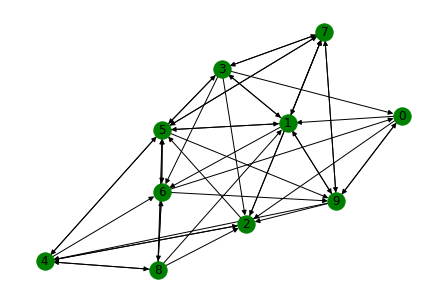

<Figure size 1080x720 with 0 Axes>

In [5]:
Graph = nx.gnp_random_graph(10, 0.5, directed=True)
nx.draw(Graph, with_labels=True, node_color='green') #draw the network graph 
plt.figure(figsize=(15,10))
plt.show() #to show the graph by plotting it

In [4]:
import networkx as nx
import matplotlib.pyplot as plt